In [1]:
import tensorflow as tf
import numpy as np

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [2]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [4]:
import warnings
warnings.filterwarnings('ignore')

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units = 1, input_dim = 4, activation = 'linear'))
tf.model.compile(loss = 'mse', optimizer = tf.keras.optimizers.SGD(lr=1e-5))
tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = tf.model.fit(x_data, y_data, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 156ms/step - loss: 6113635328.0000
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 6716774264808405412610048.0000
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: inf
Epoch 4/100
1/1 [==============================] - 0s 999us/step - loss: inf
Epoch 5/100
1/1 [==============================] - 0s 997us/step - loss: inf
Epoch 6/100
1/1 [==============================] - 0s 997us/step - loss: inf
Epoch 7/100
1/1 [==============================] - 0s 998us/step - loss: nan
Epoch 8/100
1/1 [==============================] - 0s 998us/step - loss: nan
Epoch 9/100
1/1 [==============================] - 0s 998us/step - loss: nan
Epoch 10/100
1/1 [==============================] - 0s 998us/step - loss: nan
Epoch 11/100
1/1 [==============================] - 0s 997us/step - loss: nan
Epoch 12/100
1/1 [==============================] - 0s 998us/step - loss: nan
Epoch 13/100
1/1 [===================

In [6]:
print(history.history['loss'])

[6113635328.0, 6.716774264808405e+24, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


### LInear regression with min max

In [7]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

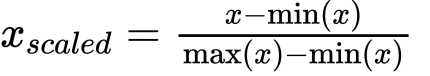

In [13]:
from IPython.display import Image
size = 300,300
image1 = Image('minmax.png')
image1

### Normalized inputs(min-max scale)

데이터가 매우 클때!

In [8]:
xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

In [9]:
# very important. It does not work without it.
xy = min_max_scaler(xy)
print(xy)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [11]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=4))
tf.model.add(tf.keras.layers.Activation('linear'))
tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=1000)

predictions = tf.model.predict(x_data)
score = tf.model.evaluate(x_data, y_data)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 139ms/step - loss: 1.6012
Epoch 2/1000
1/1 [==============================] - 0s 998us/step - loss: 1.6011
Epoch 3/1000
1/1 [==============================] - 0s 999us/step - loss: 1.6010
Epoch 4/1000
1/1 [==============================] - 0s 997us/step - loss: 1.6008
Epoch 5/1000
1/1 [==============================] - 0s 999us/step - loss: 1.6007
Epoch 6/1000
1/1 [==============================] - 0s 997us/step - loss: 1.6006
Epoch 7/1000
1/1 [==================

Epoch 94/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5904
Epoch 95/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5903
Epoch 96/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5902
Epoch 97/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5901
Epoch 98/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5899
Epoch 99/1000
1/1 [==============================] - 0s 999us/step - loss: 1.5898
Epoch 100/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5897
Epoch 101/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5896
Epoch 102/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5895
Epoch 103/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5894
Epoch 104/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5892
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5891
Epoch 106/1000

1/1 [==============================] - 0s 3ms/step - loss: 1.5790
Epoch 194/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5789
Epoch 195/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5788
Epoch 196/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5786
Epoch 197/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5785
Epoch 198/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.5784
Epoch 199/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5783
Epoch 200/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5782
Epoch 201/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5781
Epoch 202/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5780
Epoch 203/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5778
Epoch 204/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5777
Epoch 205/1000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 1.5677
Epoch 293/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5676
Epoch 294/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5674
Epoch 295/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5673
Epoch 296/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5672
Epoch 297/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5671
Epoch 298/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5670
Epoch 299/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5669
Epoch 300/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5668
Epoch 301/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5667
Epoch 302/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5665
Epoch 303/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5664
Epoch 304/1000
1/1 [=========

1/1 [==============================] - 0s 998us/step - loss: 1.5564
Epoch 392/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5563
Epoch 393/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5562
Epoch 394/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5561
Epoch 395/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5560
Epoch 396/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5559
Epoch 397/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5558
Epoch 398/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5556
Epoch 399/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5555
Epoch 400/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5554
Epoch 401/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5553
Epoch 402/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5552
Epoch 403/1000
1/1 [=======

1/1 [==============================] - 0s 997us/step - loss: 1.5453
Epoch 491/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5452
Epoch 492/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5451
Epoch 493/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5449
Epoch 494/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5448
Epoch 495/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5447
Epoch 496/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5446
Epoch 497/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5445
Epoch 498/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5444
Epoch 499/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5443
Epoch 500/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5442
Epoch 501/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5441
Epoch 502/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 1.5342
Epoch 590/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5341
Epoch 591/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5340
Epoch 592/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5339
Epoch 593/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5338
Epoch 594/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5337
Epoch 595/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5336
Epoch 596/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5334
Epoch 597/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5333
Epoch 598/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5332
Epoch 599/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5331
Epoch 600/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5330
Epoch 601/1000
1/1 [===============

Epoch 689/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5231
Epoch 690/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5230
Epoch 691/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5229
Epoch 692/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5228
Epoch 693/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5227
Epoch 694/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5226
Epoch 695/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5225
Epoch 696/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5224
Epoch 697/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5222
Epoch 698/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5221
Epoch 699/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5220
Epoch 700/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5219
Epoch 701/

1/1 [==============================] - 0s 2ms/step - loss: 1.5122
Epoch 789/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5121
Epoch 790/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5120
Epoch 791/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5119
Epoch 792/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5118
Epoch 793/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5117
Epoch 794/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5116
Epoch 795/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5115
Epoch 796/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5113
Epoch 797/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5112
Epoch 798/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5111
Epoch 799/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.5110
Epoch 800/1000
1/1 [===========

1/1 [==============================] - 0s 998us/step - loss: 1.5014
Epoch 888/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5013
Epoch 889/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5012
Epoch 890/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5011
Epoch 891/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5010
Epoch 892/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5009
Epoch 893/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5008
Epoch 894/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5006
Epoch 895/1000
1/1 [==============================] - 0s 999us/step - loss: 1.5005
Epoch 896/1000
1/1 [==============================] - 0s 996us/step - loss: 1.5004
Epoch 897/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5003
Epoch 898/1000
1/1 [==============================] - 0s 997us/step - loss: 1.5002
Epoch 899/1000
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 1.4907
Epoch 987/1000
1/1 [==============================] - 0s 967us/step - loss: 1.4906
Epoch 988/1000
1/1 [==============================] - 0s 998us/step - loss: 1.4905
Epoch 989/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.4903
Epoch 990/1000
1/1 [==============================] - 0s 997us/step - loss: 1.4902
Epoch 991/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.4901
Epoch 992/1000
1/1 [==============================] - 0s 999us/step - loss: 1.4900
Epoch 993/1000
1/1 [==============================] - 0s 998us/step - loss: 1.4899
Epoch 994/1000
1/1 [==============================] - 0s 997us/step - loss: 1.4898
Epoch 995/1000
1/1 [==============================] - 0s 999us/step - loss: 1.4897
Epoch 996/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.4896
Epoch 997/1000
1/1 [==============================] - 0s 997us/step - loss: 1.4895
Epoch 998/1000
1/1 [=======

In [12]:
print('Prediction: \n', predictions)
print('Cost: ', score)

Prediction: 
 [[-0.30826366]
 [-1.2737879 ]
 [-0.8668978 ]
 [-0.3476498 ]
 [-0.63145864]
 [-0.53422457]
 [-0.4583823 ]
 [-0.45150617]]
Cost:  1.4890539646148682
